In [1]:
!pip install pykrx

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from pykrx import stock
from pykrx import bond

In [3]:
df = stock.get_market_ohlcv("20220720", "20220810", "005930")

In [4]:
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2022-07-20,61800,62100,60500,60500,16782238,-0.656814
2022-07-21,61100,61900,60700,61800,12291374,2.148760
2022-07-22,61800,62200,61200,61300,10261310,-0.809061
2022-07-25,60900,61900,60800,61100,9193681,-0.326264
2022-07-26,60800,61900,60800,61700,6597211,0.981997
2022-07-27,61300,61900,61200,61800,7320997,0.162075
2022-07-28,62300,62600,61600,61900,10745302,0.161812
2022-07-29,62400,62600,61300,61400,15093120,-0.807754
2022-08-01,61000,61700,60300,61300,13154816,-0.162866


In [5]:
from io import StringIO
csv_buffer = StringIO()
df.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

날짜,시가,고가,저가,종가,거래량,등락률
2022-07-20,61800,62100,60500,60500,16782238,-0.6568144499178982
2022-07-21,61100,61900,60700,61800,12291374,2.1487603305785123
2022-07-22,61800,62200,61200,61300,10261310,-0.8090614886731391
2022-07-25,60900,61900,60800,61100,9193681,-0.3262642740619902
2022-07-26,60800,61900,60800,61700,6597211,0.9819967266775778
2022-07-27,61300,61900,61200,61800,7320997,0.1620745542949757
2022-07-28,62300,62600,61600,61900,10745302,0.16181229773462785
2022-07-29,62400,62600,61300,61400,15093120,-0.8077544426494345
2022-08-01,61000,61700,60300,61300,13154816,-0.16286644951140067
2022-08-02,61200,61900,61000,61700,13614895,0.6525285481239804
2022-08-03,61600,61600,61000,61300,10053861,-0.6482982171799028
2022-08-04,61700,61800,61200,61500,9125439,0.3262642740619902
2022-08-05,61700,61900,61200,61500,9567620,0.0
2022-08-08,61400,61400,60600,60800,11313150,-1.1382113821138211
2022-08-09,60600,60700,59600,60000,18251170,-1.3157894736842104
2022-08-10,58900,59200,58600,59100,1808434

In [6]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "system",
      "content": "다음은 삼성전자의 날짜별 주가 데이터야. 이 데이터를 분석해서 보고해줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

삼성전자의 주가 데이터를 분석한 결과는 다음과 같습니다.

### 1. 데이터 개요
- **기간**: 2022년 7월 20일부터 2022년 8월 10일까지
- **주요 지표**:
  - **시가**: 주식이 거래된 첫 가격
  - **고가**: 거래 기간 동안의 최고 가격
  - **저가**: 거래 기간 동안의 최저 가격
  - **종가**: 거래가 종료된 가격
  - **거래량**: 해당 날짜에 거래된 주식의 수
  - **등락률**: 전일 대비 주가의 변동 비율

### 2. 주가 동향
- **최고가**: 2022년 7월 28일, 62,600원
- **최저가**: 2022년 8월 10일, 58,900원
- **종가 변화**:
  - 7월 20일: 60,500원
  - 8월 10일: 59,100원
  - 전체적으로 주가는 하락세를 보임.

### 3. 거래량 분석
- 거래량은 7월 20일 16,782,238주에서 시작하여, 8월 10일에는 18,084,349주로 증가.
- 특히 8월 9일에는 18,251,170주로 가장 높은 거래량을 기록.

### 4. 등락률 분석
- **상승일**: 7월 21일, 7월 26일, 7월 28일, 8월 2일, 8월 4일
- **하락일**: 7월 20일, 7월 22일, 7월 25일, 7월 29일, 8월 1일, 8월 3일, 8월 8일, 8월 9일, 8월 10일
- 전반적으로 하락세가 두드러지며, 특히 8월 9일과 10일의 하락폭이 컸음.

### 5. 결론
- 삼성전자의 주가는 분석 기간 동안 전반적으로 하락세를 보였으며, 특히 8월 초부터 중순까지의 하락폭이 두드러짐.
- 거래량은 증가하는 추세이나, 주가 하락과 함께 거래량이 증가하는 경향을 보임.
- 향후 주가 회복 여부는 외부 경제 요인 및 기업 실적에 따라 달라질 것으로 예상됨.

이 데이터 분석을 통해 삼성전자의 주가 동향을 이해하고, 향후 투자 결정을 위한 기초 자료로 활용할 수 있습니다.


             Open        High         Low       Close        Volume  \
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02   
mean   112.154320  114.167856  109.746308  112.007024  3.650237e+08   
std     24.700119   24.909369   24.199319   24.500396  1.609540e+08   
min     59.570000   59.910000   58.584999   59.653999  1.051570e+08   
25%     89.723497   91.102499   88.225000   89.970999  2.377458e+08   
50%    118.340500  120.475002  115.590000  117.959999  3.267490e+08   
75%    134.024998  136.285000  130.622501  133.144997  4.528265e+08   
max    153.029999  153.130005  147.820007  149.429993  1.142269e+09   

        Adj Close  
count  250.000000  
mean   111.991719  
std     24.505019  
min     59.637093  
25%     89.949713  
50%    117.941780  
75%    133.142708  
max    149.429993  


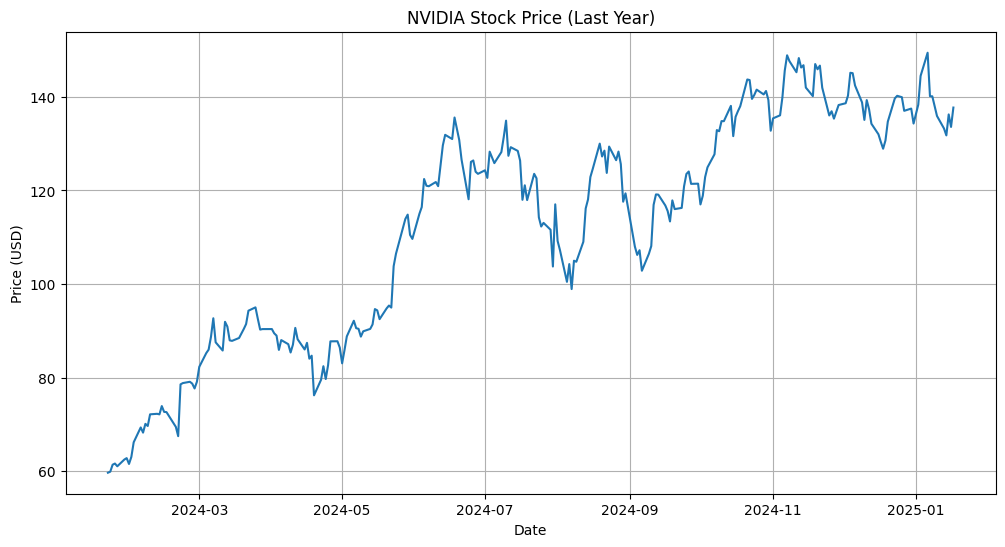

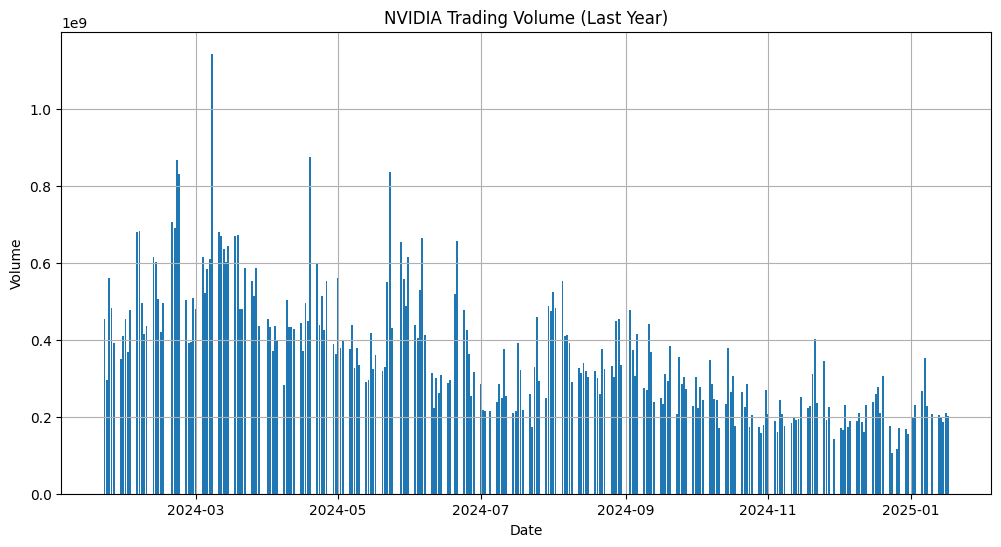

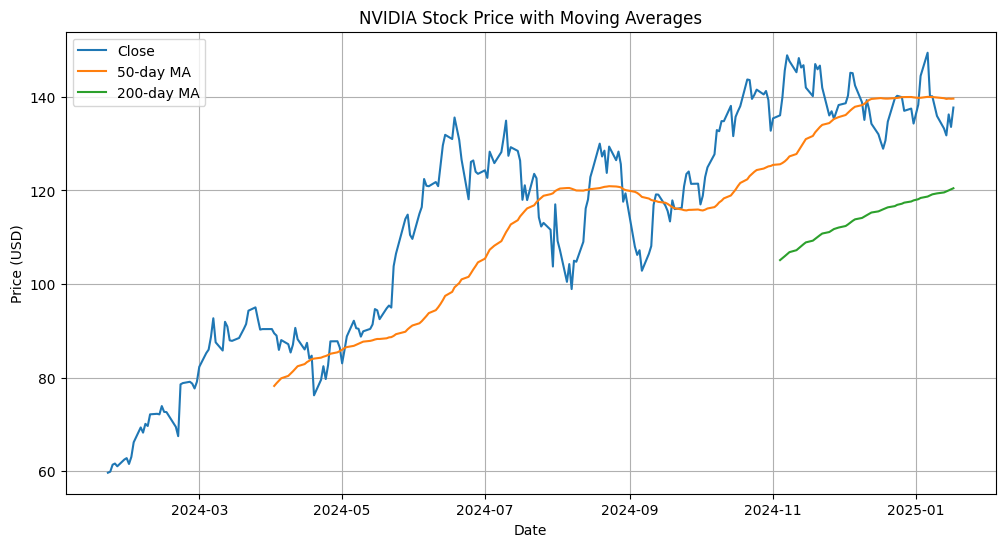

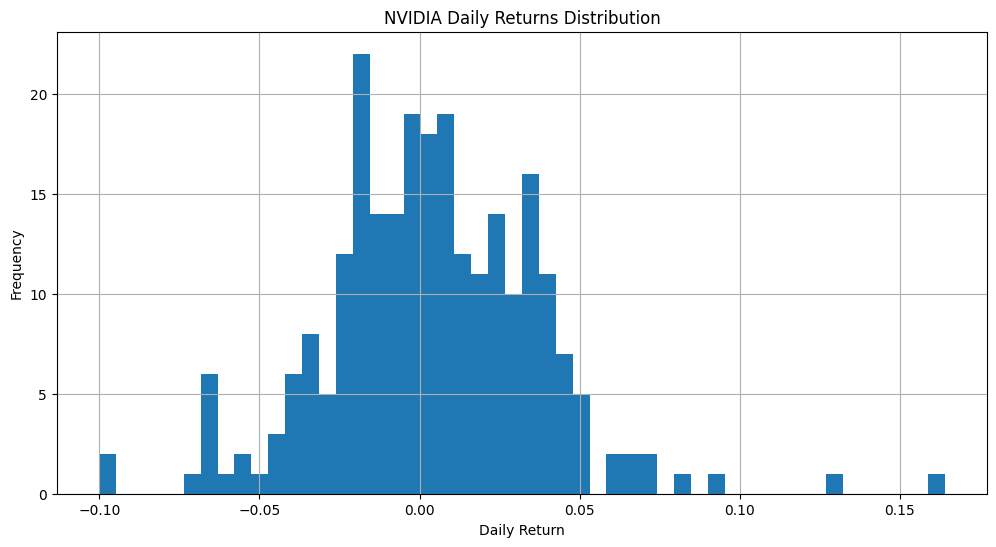

In [5]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 엔비디아 주식 심볼
symbol = 'NVDA'

# 데이터 기간 설정
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # 1년 전부터

# 주가 데이터 가져오기
df = fdr.DataReader(symbol, start_date, end_date)

# 기본 통계 출력
print(df.describe())

# 종가 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('NVIDIA Stock Price (Last Year)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# 거래량 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'])
plt.title('NVIDIA Trading Volume (Last Year)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 이동평균선 추가
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['MA50'], label='50-day MA')
plt.plot(df.index, df['MA200'], label='200-day MA')
plt.title('NVIDIA Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 일일 수익률 계산
df['Daily Return'] = df['Close'].pct_change()

# 일일 수익률 히스토그램
plt.figure(figsize=(12, 6))
df['Daily Return'].hist(bins=50)
plt.title('NVIDIA Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()
